# Import Libraries

In [1]:
!pip install seaborn


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


%matplotlib inline

In [3]:
advdata = pd.read_csv('predict.csv')

In [4]:
advdata.head()

,Time spent on Internet,Daily Internet Usage,Country,City,Area Income,Male/Female,Age of people who use website,Timestamp,Ad Topic Line,Clicked on Ad,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,68.95,256.09,Tunisia,Wrightburgh,61833.90,0,35,2016-03-27 0:53,Cloned 5thgeneration orchestration,0,NaN,NaN,NaN
1,80.23,193.77,Nauru,West Jodi,68441.85,1,31,2016-04-04 1:39,Monitored national standardization,0,NaN,NaN,NaN
2,69.47,236.50,San Marino,Davidton,59785.94,0,26,2016-03-13 20:35,Organic bottom-line service-desk,0,NaN,NaN,NaN
3,74.15,245.89,Italy,West Terrifurt,54806.18,1,29,2016-01-10 2:31,Triple-buffered reciprocal time-frame,0,NaN,NaN,NaN
4,68.37,225.58,Iceland,South Manuel,73889.99,0,35,2016-06-03 3:36,Robust logistical utilization,0,NaN,NaN,NaN


** removing Nan values **

In [5]:
advdata.drop('Unnamed: 10',axis=1,inplace = True)
advdata.drop('Unnamed: 11',axis=1,inplace = True)
advdata.drop('Unnamed: 12',axis=1,inplace = True)

In [6]:
advdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Time spent on Internet           1000 non-null float64
Daily Internet Usage             1000 non-null float64
Country                          1000 non-null object
City                             1000 non-null object
Area Income                      1000 non-null float64
Male/Female                      1000 non-null int64
Age of people who use website    1000 non-null int64
Timestamp                        1000 non-null object
Ad Topic Line                    1000 non-null object
Clicked on Ad                    1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
advdata.describe()

,Time spent on Internet,Daily Internet Usage,Area Income,Male/Female,Age of people who use website,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,180.000100,55000.000080,0.481000,36.009000,0.50000
std,15.853615,43.902339,13414.634022,0.499889,8.785562,0.50025
min,32.600000,104.780000,13996.500000,0.000000,19.000000,0.00000
25%,51.360000,138.830000,47031.802500,0.000000,29.000000,0.00000
50%,68.215000,183.130000,57012.300000,0.000000,35.000000,0.50000
75%,78.547500,218.792500,65470.635000,1.000000,42.000000,1.00000
max,91.430000,269.960000,79484.800000,1.000000,61.000000,1.00000





#  Exploratory Data Analysis


In [8]:
advdata['Male/Female'].value_counts()

0    519
1    481
Name: Male/Female, dtype: int64

In [9]:

advdata['Age of people who use website'].value_counts()

31    60
36    50
28    48
29    48
33    43
30    39
34    39
35    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
39    30
45    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
49    18
46    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
21     6
20     6
19     6
57     6
60     4
58     4
56     2
59     2
61     1
Name: Age of people who use website, dtype: int64

In [10]:
advdata['Age of people who use website'].unique()

array([35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 24, 41, 36, 40, 52, 28,
       34, 22, 57, 53, 39, 46, 32, 25, 43, 45, 50, 47, 27, 42, 38, 54, 21,
       60, 55, 44, 58, 56, 51, 19, 59, 61], dtype=int64)

In [11]:

advdata['Male/Female'].unique()

array([0, 1], dtype=int64)



** Histogram showing the distribution of Age **

In [12]:
sns.set_style('whitegrid')


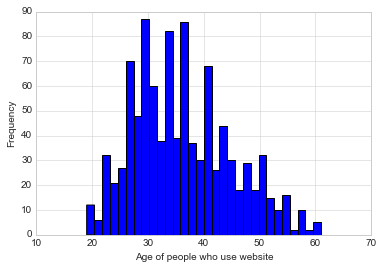

In [13]:
advdata['Age of people who use website'].plot.hist(bins=30)
plt.xlabel('Age of people who use website')

**Jointplot showing Area Income versus Age.**

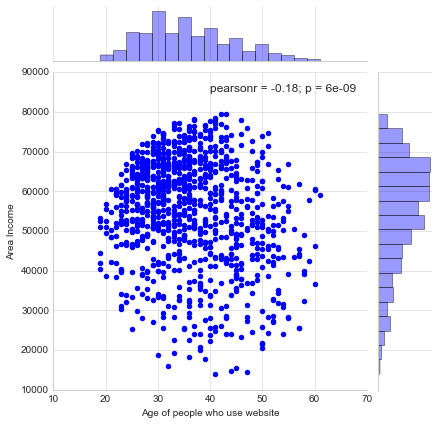

In [14]:
sns.jointplot(x='Age of people who use website',y='Area Income',data=advdata)

# Missing values

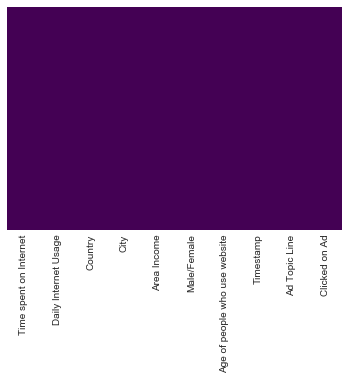

In [15]:
sns.heatmap(advdata.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**jointplot of "Daily Time spent on site vs. Age"**

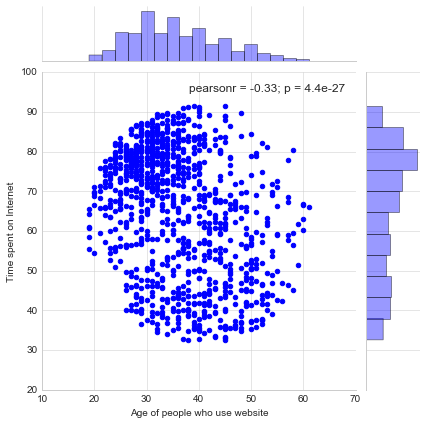

In [16]:
sns.jointplot(x=advdata['Age of people who use website'], y=advdata['Time spent on Internet'])

** jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

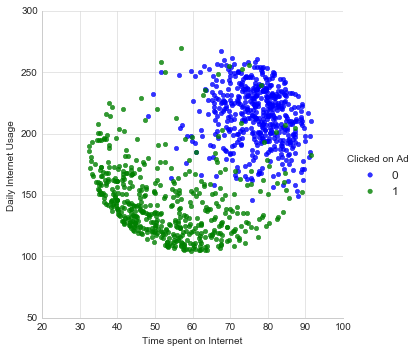

In [17]:
sns.lmplot(x='Time spent on Internet', y='Daily Internet Usage', hue='Clicked on Ad', data=advdata, fit_reg=False)

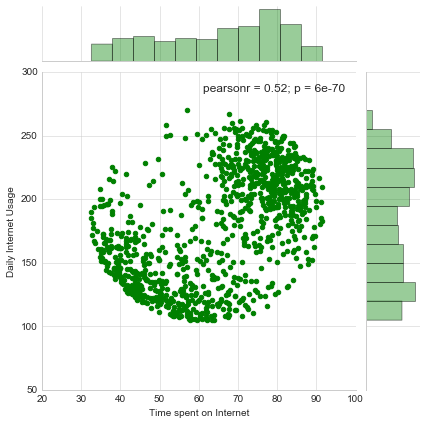

In [18]:
sns.jointplot(x='Time spent on Internet', y='Daily Internet Usage',data=advdata,color='green')

**Pairplot with the hue defined by the 'Clicked on Ad'**

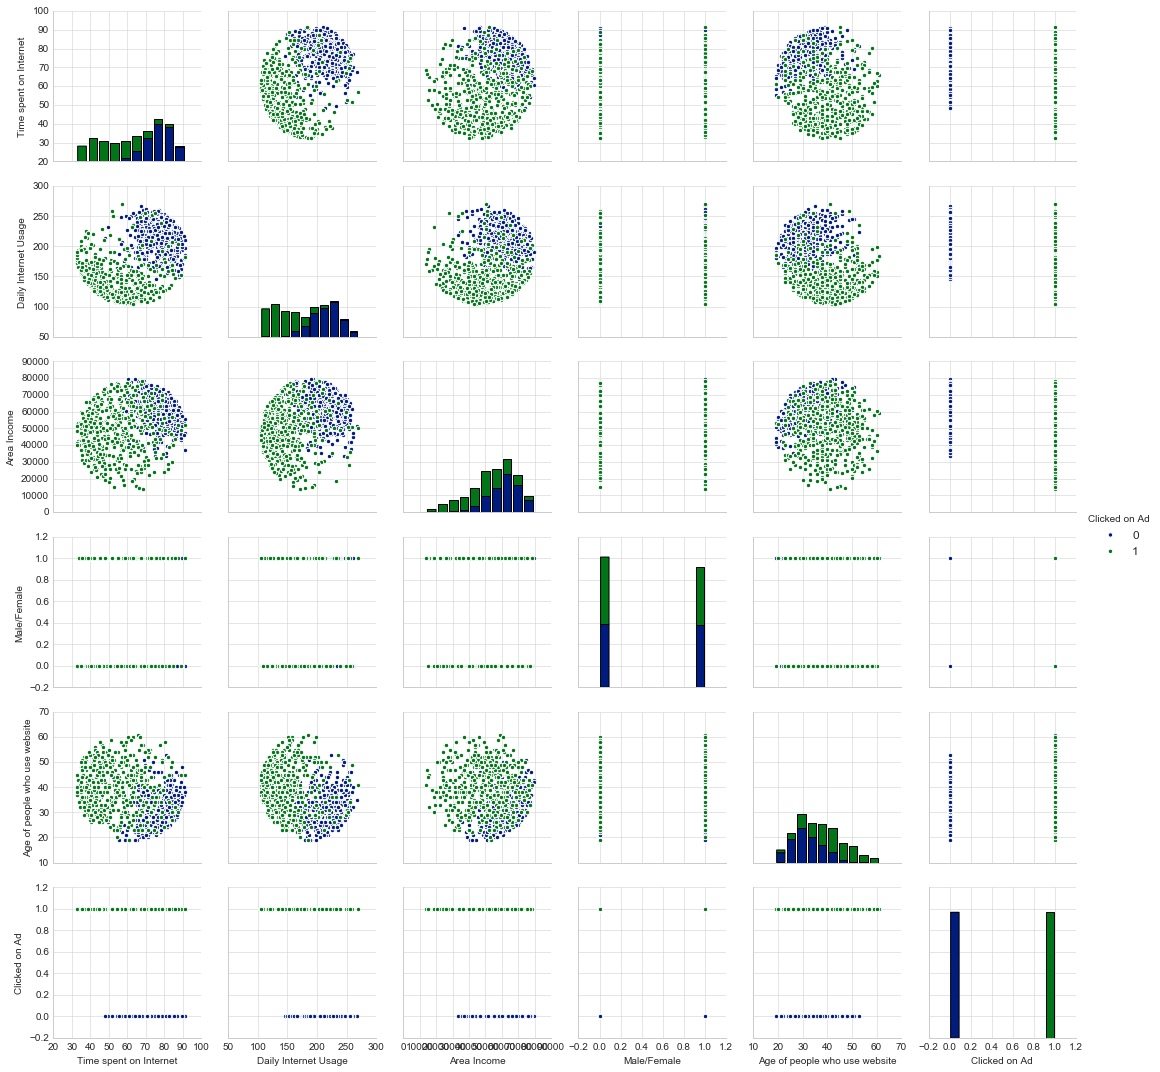

In [20]:

sns.pairplot(advdata,hue='Clicked on Ad',palette='dark')

# Predective model

** cleaning the data**

In [23]:
advdata.drop('Ad Topic Line',axis=1,inplace = True)
advdata.drop('Timestamp',axis=1,inplace = True)
advdata.drop('Country',axis=1,inplace = True)


** creating dummy variables**

In [24]:
city = pd.get_dummies(data = advdata['City'])
advdata = pd.concat([advdata,city],axis=1)

** drop city **

In [25]:
advdata.drop('City',axis=1,inplace = True)

In [26]:
advdata.head()

,Time spent on Internet,Daily Internet Usage,Area Income,Male/Female,Age of people who use website,Clicked on Ad,Adamsbury,Adamside,Adamsstad,Alanview,...,Wintersfort,Wongland,Wrightburgh,Wrightview,Yangside,Youngburgh,Youngfort,Yuton,Zacharystad,Zacharyton
0,68.95,256.09,61833.90,0,35,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.23,193.77,68441.85,1,31,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.47,236.50,59785.94,0,26,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.15,245.89,54806.18,1,29,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68.37,225.58,73889.99,0,35,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


** Create Features and Target **

In [27]:
X = advdata.drop('Clicked on Ad', axis=1)
y = advdata['Clicked on Ad']

** Splitting the Data **

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**********---------------------------------------------------------------------- ***********************************


# Logistic Regression

**training the model**

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**getting predictions**

In [30]:
log_predictions = logmodel.predict(X_test)
log_predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

** printing accuracy **

In [31]:
print('Training score {}'.format(logmodel.score(X_train, y_train)))
print('Testing score {}'.format(logmodel.score(X_test, y_test)))

Training score 0.8928571428571429
Testing score 0.9233333333333333


** Getting classification report **

In [32]:

print(classification_report(y_test, log_predictions))


             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



** Get confusion matrix **

In [33]:


confusion_matrix(y_test, log_predictions)

array([[149,   8],
       [ 15, 128]])

** conclusion **


We can conclude the following from the above metrics

* Out of all the test data that our Regressor predicted, 92% (128 out of 136) of the times it predicited correctly if the ad was   clicked. Only 8 times the Regressor got it wrong.

* Out of all the test data that our Regressor predicted, 92%(149 out of 164)f the times it predicited correctly if the ad was     not clicked. Only 15 times the Regressor got it wrong. Out of all the test data in which ad clicked was 'yes', our Regressor     also predicted the same 92% he times. Out of all the test data in which ad clicked was 'no', our classifer also predicted the   same 90% of the times

********************************--------------------------------------------*****************************

# Different predictive model

# Decision Tree

** training model **

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

** getting predictions **

In [35]:
tree_predictions = dtree.predict(X_test)

** printing accuracry **

In [36]:
print('Training score {}'.format(dtree.score(X_train, y_train)))
print('Testing score {}'.format(dtree.score(X_test, y_test)))

Training score 1.0
Testing score 0.9533333333333334


** classification report & confusion matrix **

In [37]:
print(classification_report(y_test, tree_predictions))
confusion_matrix(y_test, tree_predictions)

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       157
          1       0.96      0.94      0.95       143

avg / total       0.95      0.95      0.95       300



array([[152,   5],
       [  9, 134]])




# Random Forest

** training model **

In [38]:

rndmf = RandomForestClassifier(n_estimators=200)
rndmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

** getting predictions **

In [39]:
rndmf_predictions = rndmf.predict(X_test)

** printing accuracy **

In [40]:
print('Training score {}'.format(rndmf.score(X_train, y_train)))
print('Testing score {}'.format(rndmf.score(X_test, y_test)))

Training score 1.0
Testing score 0.9566666666666667


In [41]:
rndmf = RandomForestClassifier(max_depth=6)
rndmf.fit(X_train, y_train)
print('Training score {}'.format(rndmf.score(X_train, y_train)))
print('Testing score {}'.format(rndmf.score(X_test, y_test)))

Training score 0.8885714285714286
Testing score 0.9133333333333333


** Getting classification report & Get confusion matrix **

In [42]:
print(classification_report(y_test, rndmf_predictions))
confusion_matrix(y_test, rndmf_predictions)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       157
          1       0.96      0.94      0.95       143

avg / total       0.96      0.96      0.96       300



array([[152,   5],
       [  8, 135]])

** conclusion **












We can conclude the following from the above metrics

* Out of all the test data that our classifier predicted, 93% (135 out of 140) of the times it predicited correctly if the ad     was clicked. Only 5 times the classifier got it wrong.
* Out of all the test data that our classifier predicted, 93%(152 out of 160)f the times it predicited correctly if the ad was noticked. Only 13 times the classifier got it wrong.
Out of all the test data in which ad clicked was 'yes', our classifer also predicted the same 93% he times.
Out of all the test data in which ad clicked was 'no', our classifer also predicted the same 93% of the times